In [1]:
import cv2
import numpy as np
import copy
img_np = np.ones([5, 5])
print(img_np)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [2]:
kernel = np.array([-1, 0, 1])
print(kernel)

[-1  0  1]


In [3]:
img_cv = cv2.resize(img_np, (5, 5))
print(img_cv)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [4]:
kernel = cv2.resize(kernel, (1, 3))
print(kernel)

[[-1]
 [ 0]
 [ 1]]


In [5]:
img_cv[0][0] = 0
img_cv[2][2] = 2
img_cv[4][4] = 3
print(img_cv)

[[0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 2. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 3.]]


In [6]:
conv_test = cv2.filter2D(img_cv, -1, kernel)
print(conv_test)

[[ 0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  2.]
 [ 0.  0.  0.  0.  0.]]


In [7]:
def filter_2d(input_img, kernel):
    input_img = copy.deepcopy(input_img)
    output_img = copy.deepcopy(input_img)
    for row in range(input_img.shape[0]):
        output_img[row][0] = input_img[row][1] * kernel[0] + \
                        input_img[row][0] * kernel[1] + \
                        input_img[row][1] * kernel[2]
        for col in range(1, input_img.shape[1] - 1):
            output_img[row][col] = input_img[row][col - 1] * kernel[0] + \
                        input_img[row][col] * kernel[1] + \
                        input_img[row][col + 1] * kernel[2]
        output_img[row][input_img.shape[1] - 1] = \
            input_img[row][input_img.shape[1] - 2] * kernel[0] + \
            input_img[row][input_img.shape[1] - 1] * kernel[1] + \
            input_img[row][input_img.shape[1] - 2] * kernel[2]
    return output_img.T

In [8]:
conv_img = filter_2d(img_cv, kernel)
conv_img2 = cv2.filter2D(img_cv, -1, kernel)
print(conv_img)
print(conv_img == conv_img2)

[[ 0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  2.]
 [ 0.  0.  0.  0.  0.]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow.keras
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

Using TensorFlow backend.


In [10]:
resModel = ResNet50()
resModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

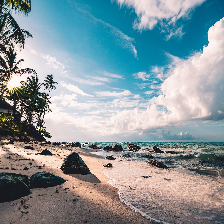

In [11]:
sea_img = image.load_img("test_image_3.jpg", target_size = (224, 224))
sea_img

In [12]:
trans_img = image.img_to_array(sea_img)
print(trans_img.shape)

(224, 224, 3)


In [13]:
trans_img = np.expand_dims(trans_img, axis = 0)
print(trans_img.shape)

(1, 224, 224, 3)


In [14]:
trans_img = preprocess_input(trans_img)
print(trans_img.shape)

(1, 224, 224, 3)


In [15]:
pred = resModel.predict(trans_img)

In [16]:
label = decode_predictions(pred)
for i in range(5):
    print('%16s (%.2f%%)' % (label[0][i][1], label[0][i][2] * 100))

        seashore (62.45%)
         sandbar (22.48%)
leatherback_turtle (2.46%)
        lakeside (2.44%)
         snorkel (1.50%)
